### Gráfico de líneas (plot lines)
Se usan para series temporales o secuenciales de datos, métricas en evolución y comparación de tendencias.

##### Comparación interanual PIB / PBI Latino
[Dataset (fuente: Banco Mundial)](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD)

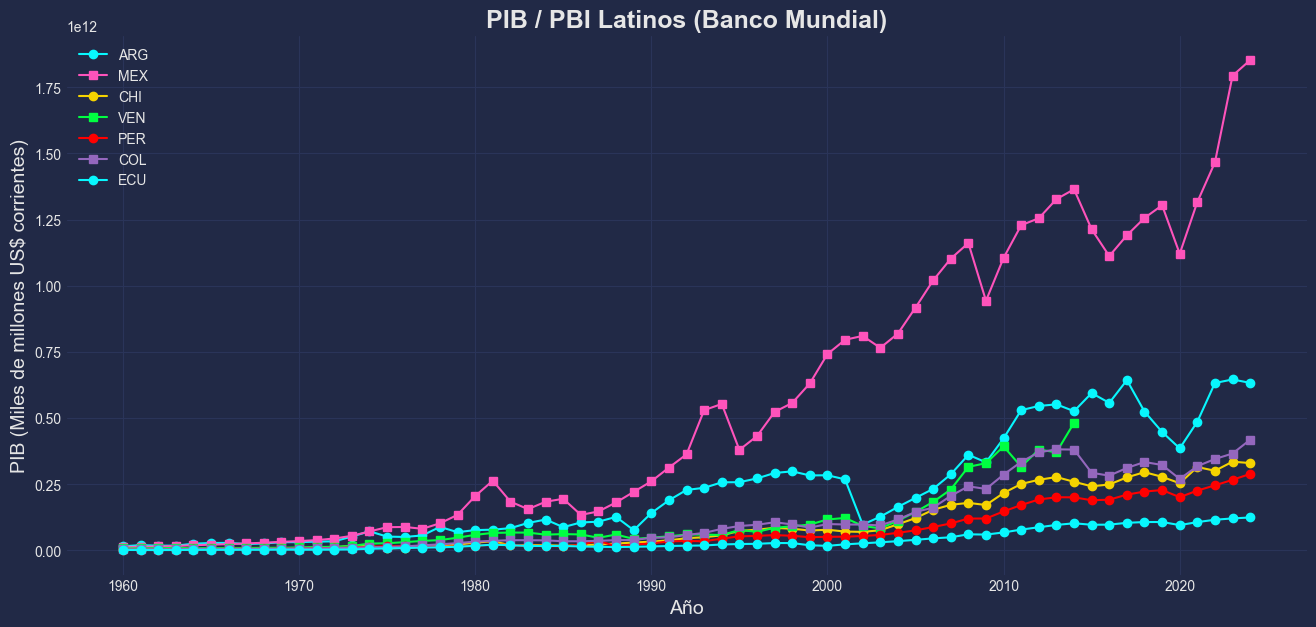

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import mplcyberpunk

#! Dataframe
exclude_cols = ['Country Name', 'Indicator Name', 'Indicator Code']
df = pd.read_csv('data/pbi_world_bank.csv', usecols=lambda col: col not in exclude_cols, skiprows=4)
df = df[df["Country Code"].isin(["ARG", "MEX", "ECU", "PER", "COL", "CHL", "VEN"])]

df_apilado = df.set_index('Country Code').stack().reset_index()
df_apilado.columns = ['Country Code', 'Year', 'Value']
df_apilado['Year'] = pd.to_numeric(df_apilado['Year'])
df_apilado['Value'] = pd.to_numeric(df_apilado['Value'], errors='coerce')

arg = df_apilado[df_apilado['Country Code'] == 'ARG']
mex = df_apilado[df_apilado['Country Code'] == 'MEX']
chi = df_apilado[df_apilado['Country Code'] == 'CHL']
ven = df_apilado[df_apilado['Country Code'] == 'VEN']
per = df_apilado[df_apilado['Country Code'] == 'PER']
col = df_apilado[df_apilado['Country Code'] == 'COL']
ecu = df_apilado[df_apilado['Country Code'] == 'ECU']

plt.style.use("cyberpunk") #! Template

plt.figure(figsize=(16, 7))

plt.plot(arg['Year'], arg['Value'], marker='o', label="ARG")
plt.plot(mex['Year'], mex['Value'], marker='s', label="MEX")
plt.plot(chi['Year'], chi['Value'], marker='o', label="CHI")
plt.plot(ven['Year'], ven['Value'], marker='s', label="VEN")
plt.plot(per['Year'], per['Value'], marker='o', label="PER")
plt.plot(col['Year'], col['Value'], marker='s', label="COL")
plt.plot(ecu['Year'], ecu['Value'], marker='o', label="ECU")


#mplcyberpunk.add_glow_effects() #! Efecto de brillo

plt.title("PIB / PBI Latinos (Banco Mundial)", fontsize=18, weight='bold')
plt.xlabel("Año", fontsize=14)
plt.ylabel("PIB (Miles de millones US$ corrientes)", fontsize=14)

plt.legend()
plt.show()